In [4]:
import pandas as pd

df=pd.read_csv("datasets/ad.csv")
df.head()

,index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.drop(['index','newspaper','radio'],inplace=True,axis=1)
df.head()

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
X=df.drop(['sales'],axis=1)
y=df['sales']
print(X[:5])
print(y[:5])

      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)

print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(150, 1)   (50, 1)   (150,)   (50,)


In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [16]:
print("slope=  ",reg.coef_)
print("intercept=  ",reg.intercept_)

print("y = ",reg.coef_,"x + ",reg.intercept_)

slope=   [0.04802945]
intercept=   6.91197261886872
y =  [0.04802945] x +  6.91197261886872


In [18]:
y_pred=reg.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[17.03658069 16.63793625 11.50839099 20.36982452 19.10184704]
58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64


In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

print("mean squared error is : ",mean_squared_error(y_test,y_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,y_pred))
print("root mean squared error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

mean squared error is :  10.310069587813155
mean absolute error is :  2.4643080986027908
root mean squared error is :  3.210929707703542


In [20]:
reg.score(X,y)

0.6117236700337467

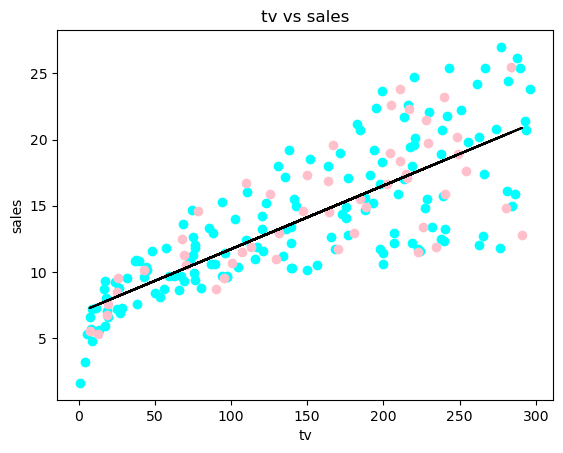

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train,c="cyan")
plt.scatter(x_test,y_test,c="pink")

plt.xlabel("tv")
plt.ylabel("sales")
plt.title("tv vs sales")

plt.plot(x_test,y_pred,c="black")